https://hackernoon.com/logistic-regression-train-model-in-python-and-use-it-on-angular-front-end-u1s3u95

https://stackblitz.com/edit/ms-ng-pub-movie-sentiment-analysis-logistic-regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

from sklearn import __version__

__version__

'0.24.1'

In [3]:
# dataset can be found at: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [4]:
def prepare_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    return df

In [5]:
df = prepare_dataset()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


<AxesSubplot:>

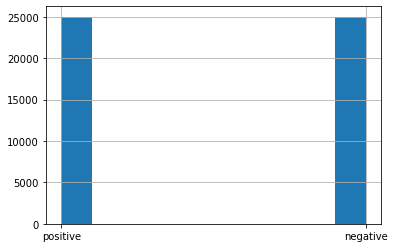

In [7]:
df['sentiment'].hist()

In [8]:
def assertions(model, vectorizer):
    sents = []
    predictions = []
    results = []
    y_true = []
    
    def run(sentences, expect, ifNot):
        for sent in sentences:
            pred = predict(sent, model, vectorizer)[0]
            result = 'Correct' if pred == expect else ifNot
            sents.append(sent)
            predictions.append(pred)
            y_true.append(expect)
            results.append(result)
            
    positives = [
        'this is a great movie',
        'awesome movie'
    ]
    
    run(positives, 'positive', 'False negative')
        
    negatives = [
        'did not like it',
        'worst movie ever'
    ]
    
    run(negatives, 'negative', 'False positive')
    
    df = pd.DataFrame()
    df['Sentences'] = sents
    df['Predictions'] = predictions
    df['Expect'] = y_true
    df['Results'] = results
    
    return df

In [9]:
def predict(sentences, model, vectorizer):
    sentences = sentences if isinstance(sentences, list) else [sentences]
    vector = vectorizer.transform(sentences)
    return model.predict(vector)

In [10]:
def create_train_test(df=df):
    X = df[['review']]
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    return X_train, X_test, y_train, y_test

<AxesSubplot:>

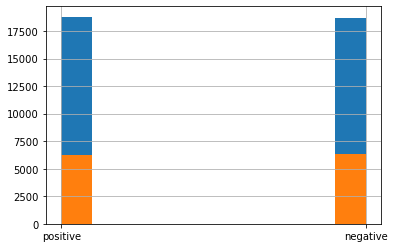

In [11]:
X_train, X_test, y_train, y_test = create_train_test()

y_train.hist()
y_test.hist()

In [12]:
def train_and_test(model, vectorizer):
    X_train_matrix = vectorizer.fit_transform(X_train['review'])
    model.fit(X_train_matrix, y_train)
    
    X_test_matrix = vectorizer.transform(X_test['review'])
    y_pred = model.predict(X_test_matrix)
    
    params = {
        'pos_label':'positive'
    }
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, **params))
    print('Recall:', recall_score(y_test, y_pred, **params))
    print('F1 Score:', f1_score(y_test, y_pred, **params))
      
    return assertions(model, vectorizer)

In [13]:
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

In [14]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(solver='liblinear')

train_and_test(regr, vectorizer)

Accuracy: 0.88224
Precision: 0.8697623514696685
Recall: 0.8969687197678168
F1 Score: 0.8831560565169074


,Sentences,Predictions,Expect,Results
0,this is a great movie,positive,positive,Correct
1,awesome movie,positive,positive,Correct
2,did not like it,negative,negative,Correct
3,worst movie ever,negative,negative,Correct


In [15]:
predict('this is a great movie.', regr, vectorizer)

array(['positive'], dtype=object)

In [16]:
predict('worst movie ever', regr, vectorizer)

array(['negative'], dtype=object)

In [17]:
import pickle

def save_model(model, vectorizer, file_name='movie_model.pkl'):
    feature_names = vectorizer.get_feature_names()
    
    model_params = {
        'model': model,
        'vectorizer': vectorizer
    }
    
    pickle.dump(model_params, open(file_name, 'wb'))

In [18]:
save_model(regr, vectorizer)

In [19]:
!ls

IMDB Dataset.csv      movie_model.pkl       setting_up_server.txt
consuming_api.ipynb   server.ipynb          user-data.txt
ml_training.ipynb     server.py


In [20]:
regr.intercept_, regr.coef_

(array([-0.02280241]),
 array([[-0.22099587,  1.79233268,  0.56260247, ..., -0.68696827,
         -1.31457985,  0.20428269]]))

In [22]:
vectorizer

TfidfVectorizer(max_features=3000, stop_words='english')